Provided is a dataset of all ‘Bundesliga’ (i.e., the top German football division) matches from the 1993/1994 season to the 2017/2018 season. The dataset contains 10 features:

–– Date : the date the match was played

–– HomeTeam : the home team

–– AwayTeam : the away team

–– FTHG : the number of goals the home team scored during the whole match

–– FTAG : the number of goals the away team scored during the whole match

–– FTR : the full time result, (H)ome, (A)way, or (D)raw

–– HTHG : the number of goals the home team scored during the first half

–– HTAG : the number of goals the away team scored during the first half

–– HTR : the half time result, (H)ome, (A)way, or (D)raw

In [660]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf

## importing SQL
import pandasql as ps
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


In [661]:
df = pd.read_csv('bundesliga_results.csv')

In [662]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94


We add useful information in new columns

In [663]:
# Total Goals in a Match
df['Total_goals'] = df['FTAG'] + df['FTHG']

# Extracting Year, Month and Day of the match
time = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['year'] = time.dt.year 
df['month'] = time.dt.month 
df['day'] = time.dt.day 


In [664]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Total_goals,year,month,day
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94,4,1993,8,7
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94,3,1993,8,7
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94,4,1993,8,7
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94,2,1993,8,7
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94,7,1993,8,7


We make another dataframe for years 1995-2018, where we have information for the first half.

In [665]:
df_9518 = pysqldf("""SELECT * FROM df where HTHG is not NULL""")

We add another column to this dataframe.

In [666]:
# Number of Goals in the Second Half (SHG)
df_9518["SHG"] = (df_9518["FTHG"]+df_9518["FTAG"]) - (df_9518["HTAG"]+df_9518["HTHG"])



In [667]:
df_9518.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Total_goals,year,month,day,SHG
0,D1,11/8/1995,Dortmund,Kaiserslautern,1,1,D,0.0,0.0,D,1995-96,2,1995,8,11,2.0
1,D1,11/8/1995,Stuttgart,Uerdingen,0,0,D,0.0,0.0,D,1995-96,0,1995,8,11,0.0
2,D1,11/8/1995,Werder Bremen,Dusseldorf,1,1,D,1.0,1.0,D,1995-96,2,1995,8,11,0.0
3,D1,12/8/1995,Bayern Munich,Hamburg,3,2,H,1.0,1.0,D,1995-96,5,1995,8,12,3.0
4,D1,12/8/1995,Ein Frankfurt,Karlsruhe,2,2,D,1.0,1.0,D,1995-96,4,1995,8,12,2.0


We first check the fact that playing as the home team is an advantage!

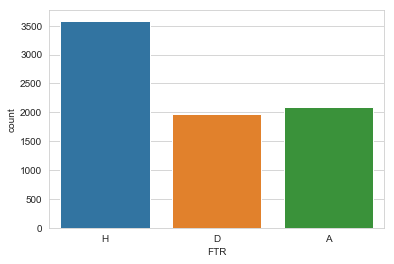

In [668]:
sns.countplot(x='FTR',data=df)

We compare the first half results with the full time results.

In [669]:
compare_half_full = pysqldf (""" select HTR as HalfTime_Result, 
                    FTR as Final_result,
                    count(*) as Total_Number from
                    df_9518
                group by HTR, FTR
                order by Total_Number desc""")

In [743]:
compare_half_full.head(9)
# we can see that the most common result is that the home team wins both the first half and the final result.
# By this, we realize how important playing in the home stadium is!

# Making comebacks(win the game after losing the first half) are the two most uncommon possibilities. 

,HalfTime_Result,Final_result,Total_Number
0,H,H,2022
1,A,A,1114
2,D,H,1090
3,D,D,1071
4,D,A,696
5,H,D,375
6,A,D,349
7,A,H,176
8,H,A,145


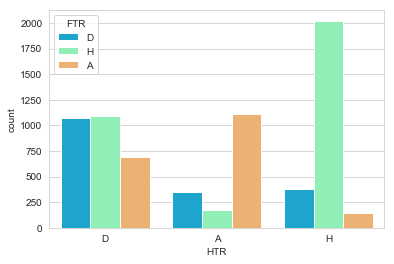

In [671]:
sns.set_style('whitegrid')
sns.countplot(x='HTR',hue='FTR',data=df_9518,palette='rainbow')

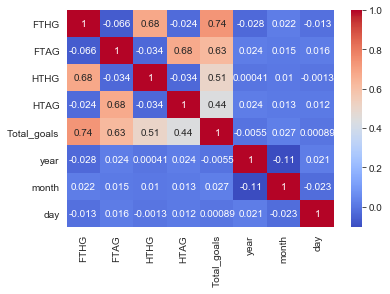

In [672]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In the above chart, there seem to be no correlation between the number of goals (FTHG,FTAG, HTHG, HTAG, and Total_goals ) and the date of the match (Year, month, day).

Now try another way to see if we can extract something meaningful!

Notice that footbal seasons typically start from August and end in May. 

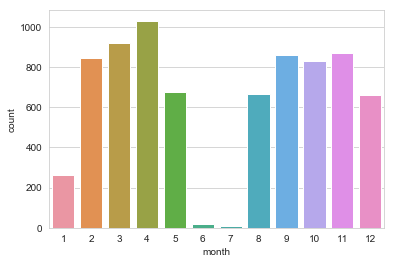

In [673]:
sns.countplot( x = "month", data = df)

Now we look at different months and search for the most goals per games.

In [674]:
by_month = df.groupby('month')
by_month['Total_goals'].describe().sort_values( ascending = False, by=['mean'])

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
6,18.0,3.777778,1.395605,1.0,3.25,4.0,4.0,6.0
5,674.0,3.235905,1.748483,0.0,2.00,3.0,4.0,9.0
11,871.0,2.962113,1.622312,0.0,2.00,3.0,4.0,8.0
8,664.0,2.924699,1.713329,0.0,2.00,3.0,4.0,9.0
10,831.0,2.922984,1.732423,0.0,2.00,3.0,4.0,10.0
9,861.0,2.915215,1.722900,0.0,2.00,3.0,4.0,9.0
3,920.0,2.816304,1.818164,0.0,2.00,3.0,4.0,11.0
4,1031.0,2.781765,1.658136,0.0,2.00,3.0,4.0,8.0
12,660.0,2.768182,1.689714,0.0,2.00,3.0,4.0,8.0


The above chart shows that games in the last month of the season has more goals per game than the rest of the season.


In [746]:
# All the games played in June were in 1995. 
# To be completely sure, we need to focus on the games played in May 1995. 
pysqldf (""" select * from
                    df
                where month='5' and year = '1995'
                """)['Total_goals'].describe().sort_values()

min       0.000000
std       1.763834
25%       2.000000
50%       3.000000
mean      3.444444
75%       4.250000
max       8.000000
count    36.000000
Name: Total_goals, dtype: float64

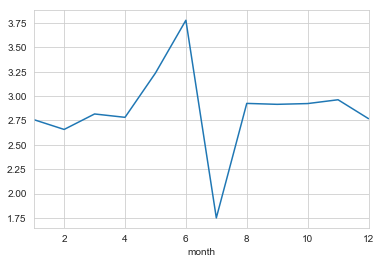

In [676]:
by_month['Total_goals'].describe()['mean'].plot()

We look at the total number of goals in different seasons. 

In [677]:
goals_per_season = pysqldf (""" select Season, sum(Total_goals) as Number_of_Goals
                                from
                                df
                                group by Season""")


In [678]:
goals_per_season['Season'] = goals_per_season['Season'].map(lambda s: int(s[:4]))


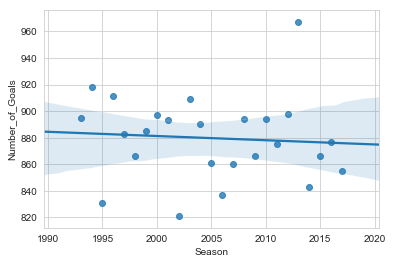

In [679]:
sns.regplot(x='Season', y='Number_of_Goals', data=goals_per_season)

As we know, making combacks are uncommon and appreciated by the fans. Lets see which teams are good at this :)

In [680]:
# ComeBacks as a HomeTeam
pysqldf (""" select HomeTeam, HTR, FTR, count(*) as Number
             from
             df_9518
             where HTR = "A" and FTR = "H"
             group by HomeTeam
             order by  Number desc """)

,HomeTeam,HTR,FTR,Number
0,Hamburg,A,H,14
1,Leverkusen,A,H,14
2,Bayern Munich,A,H,13
3,Hertha,A,H,13
4,Kaiserslautern,A,H,11
5,Werder Bremen,A,H,11
6,Dortmund,A,H,10
7,Wolfsburg,A,H,10
8,Schalke 04,A,H,8
9,Bielefeld,A,H,7


In [681]:
# ComeBacks as an AwayTeam
pysqldf (""" select AwayTeam, HTR, FTR, count(*) as Number
             from
             df_9518
             where HTR = "H" and FTR = "A"
             group by AwayTeam
             order by  Number desc """)

,AwayTeam,HTR,FTR,Number
0,Leverkusen,H,A,13
1,Bayern Munich,H,A,12
2,Stuttgart,H,A,12
3,Werder Bremen,H,A,11
4,Schalke 04,H,A,9
5,Dortmund,H,A,8
6,Hamburg,H,A,8
7,Hertha,H,A,7
8,Ein Frankfurt,H,A,6
9,Hannover,H,A,6


Now lets see among the HomeTeam/AwayTeam, which teams win the most.

In [682]:
Win_as_Hometeam = pysqldf (""" select HomeTeam, FTR, count(*) as Number_of_wins
             from
             df
             where FTR = "H"
             group by HomeTeam
             order by  Number_of_wins desc """)
Win_as_Hometeam

,HomeTeam,FTR,Number_of_wins
0,Bayern Munich,H,320
1,Dortmund,H,258
2,Leverkusen,H,234
3,Schalke 04,H,226
4,Werder Bremen,H,219
5,Stuttgart,H,202
6,Hamburg,H,195
7,Wolfsburg,H,174
8,M'gladbach,H,167
9,Hertha,H,157


In [683]:
Win_as_Awayteam = pysqldf (""" select AwayTeam, FTR, count(*) as Number_of_wins
             from
             df
             where FTR = "A"
             group by AwayTeam
             order by  Number_of_wins desc """)
Win_as_Awayteam

,AwayTeam,FTR,Number_of_wins
0,Bayern Munich,A,229
1,Leverkusen,A,165
2,Dortmund,A,157
3,Schalke 04,A,142
4,Werder Bremen,A,136
5,Stuttgart,A,120
6,Hamburg,A,111
7,Wolfsburg,A,93
8,Hertha,A,88
9,M'gladbach,A,78


In [684]:
total_win = pysqldf ("""select WH.HomeTeam,
                               WH.Number_of_wins as Home_wins, 
                               WA.Number_of_wins as Away_wins,
                               WH.Number_of_wins+WA.Number_of_wins as total_wins
             from
             Win_as_Hometeam as WH inner join 
             Win_as_Awayteam as WA
             on
             WH.HomeTeam = WA.AwayTeam
             order by  total_wins desc """)
total_win

,HomeTeam,Home_wins,Away_wins,total_wins
0,Bayern Munich,320,229,549
1,Dortmund,258,157,415
2,Leverkusen,234,165,399
3,Schalke 04,226,142,368
4,Werder Bremen,219,136,355
5,Stuttgart,202,120,322
6,Hamburg,195,111,306
7,Wolfsburg,174,93,267
8,M'gladbach,167,78,245
9,Hertha,157,88,245


The usual pointing method in Footbal is 3 points for winning, 1 point for draw and 0 point for losing. 

As we saw, winning as an away team is more difficult than winning as a home team. Because of that, we define a new metric:

Winning: 3 points as a home team, 4 points as an away team,
Draw: 1 point as a home team, 2 points as an away team,
Losing: 0 point.

In [685]:
df_Home_Winning_Scores = pysqldf (""" select HomeTeam, 3*count(*) as Home_Winning_Scores
             from
             df
             where FTR = 'H'
             group by HomeTeam
             """)
df_Home_Losing_Scores = pysqldf (""" select HomeTeam, 0*count(*) as Home_Losing_Scores
             from
             df
             where FTR = 'A'
             group by HomeTeam
             """)


df_Away_Winning_Scores = pysqldf (""" select AwayTeam, 4*count(*) as Away_Winning_Scores
             from
             df
             where FTR = 'A'
             group by AwayTeam
             """)

df_Home_Draw_Scores = pysqldf (""" select HomeTeam, 1*count(*) as Home_Draw_Scores
             from
             df
             where FTR = 'D'
             group by HomeTeam
             """)

df_Away_Draw_Scores = pysqldf (""" select AwayTeam, 2*count(*) as Away_Draw_scores
             from
             df
             where FTR = 'D'
             group by AwayTeam
             """)
df_Home_Losing_Scores = pysqldf (""" select HomeTeam, 0*count(*) as Home_Losing_Scores
             from
             df
             where FTR = 'A'
             group by HomeTeam
             """)

df_Away_Losing_Scores = pysqldf (""" select AwayTeam, 0*count(*) as Away_Losing_Scores
             from
             df
             where FTR = 'H'
             group by AwayTeam
             """)



In [686]:
df_Away_Losing_Scores.head(50)

,AwayTeam,Away_Losing_Scores
0,Aachen,0
1,Augsburg,0
2,Bayern Munich,0
3,Bielefeld,0
4,Bochum,0
5,Braunschweig,0
6,Cottbus,0
7,Darmstadt,0
8,Dortmund,0
9,Dresden,0


In [687]:
Best_Teams = pysqldf (""" select HW.HomeTeam, 
                    HW.Home_Winning_Scores + HD.Home_Draw_Scores + HL.Home_Losing_Scores +
                    AW.Away_Winning_Scores+AD.Away_Draw_scores +AL.Away_Losing_Scores as Final_Score, 
                    HW.Home_Winning_Scores, 
                    HD.Home_Draw_Scores,
                    AW.Away_Winning_Scores,
                    AD.Away_Draw_scores
             from
             df_Home_Winning_Scores as HW  inner join 
             df_Home_Draw_Scores as HD 
             on HW.HomeTeam = HD.HomeTeam
             inner join
             df_Home_Losing_Scores as HL
             on HW.HomeTeam = HL.HomeTeam
             inner join 
             df_Away_Winning_Scores as AW
             on HW.HomeTeam = AW.AwayTeam
             inner join
             df_Away_Draw_Scores as AD
             on HW.HomeTeam = AD.AwayTeam
             inner join
             df_Away_Losing_Scores as AL
             on HW.HomeTeam = AL.AwayTeam
             order by Final_Score desc
             """)

In [688]:
Best_Teams.head(10)

,HomeTeam,Final_Score,Home_Winning_Scores,Home_Draw_Scores,Away_Winning_Scores,Away_Draw_scores
0,Bayern Munich,2150,960,72,916,202
1,Dortmund,1756,774,100,628,254
2,Leverkusen,1694,702,104,660,228
3,Schalke 04,1590,678,114,568,230
4,Werder Bremen,1512,657,99,544,212
5,Stuttgart,1409,606,97,480,226
6,Hamburg,1375,585,114,444,232
7,Wolfsburg,1172,522,90,372,188
8,M'gladbach,1082,501,101,312,168
9,Hertha,1064,471,79,352,162
